## Реализация градиентного спуска

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

plt.style.use('ggplot')


### Функция Розенброка
f(x,y)=(1−x)^2+100(y−x^2)^2<dt>
Аналитич. минимум: (1, 1)<dt>
Значение в точке аналитич. минимума: f(1,1) = 0

### Функция Сферы
f(x,y)=x^2+y^2<dt>
Аналитич. минимум: (0, 0)<dt>
Значение в точке аналитич. минимума: f(0,0) = 0

### Функция Бута
f(x,y)=(x+2y−7)^2+(2x+y−5)^2<dt>
Аналитич. минимум: (1, 3)<dt>
Значение в точке аналитич. минимума: f(1,3) = 0

## Реализация тестовых функций и их градиентов


In [116]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100*(y - x**2)**2

def rosenbrock_grad_analytic(xy):  # xy -- вектор в виде numpy-массива или списка
    x, y = xy
    dfdx = -2*(1 - x) - 400*x*(y - x**2)
    dfdy = 200*(y - x**2)
    return np.array([dfdx, dfdy], dtype=float)


In [117]:
def sphere(x, y):
    return x**2 + y**2

def sphere_grad_analytic(xy):
    x, y = xy
    return np.array([2*x, 2*y], dtype=float)

In [118]:
def booth(x, y):
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def booth_grad_analytic(xy):
    x, y = xy
    df_dx = 2 * (x + 2*y - 7) + 4 * (2*x + y - 5)
    df_dy = 4 * (x + 2*y - 7) + 2 * (2*x + y - 5)
    return np.array([df_dx, df_dy], dtype=float)


## Реализация градиентного спуска

In [119]:
# x_k+1 = x_k − α ⋅ ∇f(x_k)

def gradient_descent(
    f, grad_f, x0,
    alpha=0.001,   # Шаг  обучения
    eps=1e-6,      # Критерий остановки
    max_iter=10000
):
    x_current = np.array(x0, dtype=float)
    history = [x_current.copy()]

    for _ in range(max_iter):
        grad = grad_f(x_current)
        x_next = x_current - alpha * grad
        
        # Сохраняем новую точку в историю
        history.append(x_next.copy())
        
        # Проверка критерия остановки
        if np.linalg.norm(grad) < eps:
            break
        
        x_current = x_next

    return x_current, f(*x_current), history


## Пайплайн тестирования

In [120]:
def plot_contours_rosenbrock(xmin=-2, xmax=2, ymin=-1, ymax=3, resolution=200):
    x_vals = np.linspace(xmin, xmax, resolution)
    y_vals = np.linspace(ymin, ymax, resolution)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    Z = np.zeros_like(X)
    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = rosenbrock(X[i, j], Y[i, j])
    
    fig, ax = plt.subplots(figsize=(6, 5))
    cs = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cs, ax=ax)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("функция Розенброка")
    return fig, ax


Найденная точка: [0.99439758 0.98880405], значение функции: 3.1437731529532564e-05, ошибка: 0.012519443053497286


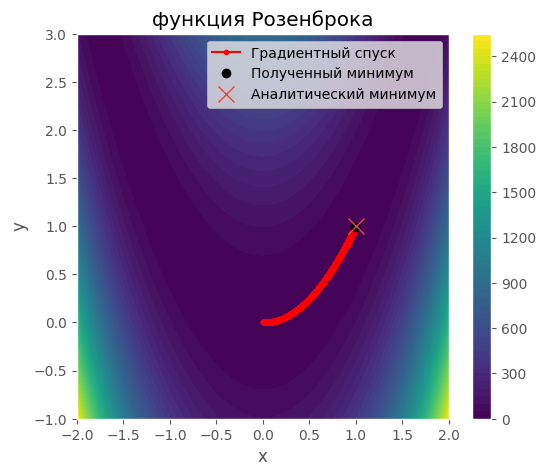

In [121]:
def test_rosenbrock():
    x0 = [0.0, 0.0]

    x_opt, f_opt, history = gradient_descent(
        f=rosenbrock,
        grad_f=rosenbrock_grad_analytic,
        x0=x0,
        alpha=0.0005,
        eps=1e-6,
        max_iter=20000
    )
    
    true_min = np.array([1.0, 1.0])
    error = np.linalg.norm(x_opt - true_min)
    print(f"Найденная точка: {x_opt}, значение функции: {f_opt}, ошибка: {error}")

    fig, ax = plot_contours_rosenbrock(xmin=-2, xmax=2, ymin=-1, ymax=3, resolution=200)
    history_arr = np.array(history)
    ax.plot(history_arr[:, 0], history_arr[:, 1], 'r.-', label='Градиентный спуск')
    ax.plot([x_opt[0]], [x_opt[1]], 'ko', label='Полученный минимум')
    ax.plot([true_min[0]], [true_min[1]], 'x', markersize=12, label='Аналитический минимум')
    ax.legend()
    plt.show()

test_rosenbrock()

![rosenbrock.png](images/rosenbrock.png)

In [122]:
def plot_contours_sphere(xmin=-2, xmax=2, ymin=-2, ymax=2, resolution=200):
    x_vals = np.linspace(xmin, xmax, resolution)
    y_vals = np.linspace(ymin, ymax, resolution)
    X, Y = np.meshgrid(x_vals, y_vals)
    
    Z = np.zeros_like(X)
    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = sphere(X[i, j], Y[i, j])
    
    fig, ax = plt.subplots(figsize=(6, 5))
    cs = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cs, ax=ax)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("функция Сфера")
    return fig, ax


Найденная точка: [ 3.48651638e-07 -3.48651638e-07], значение функции: 2.4311592910479145e-13, ошибка: 4.930678747442297e-07


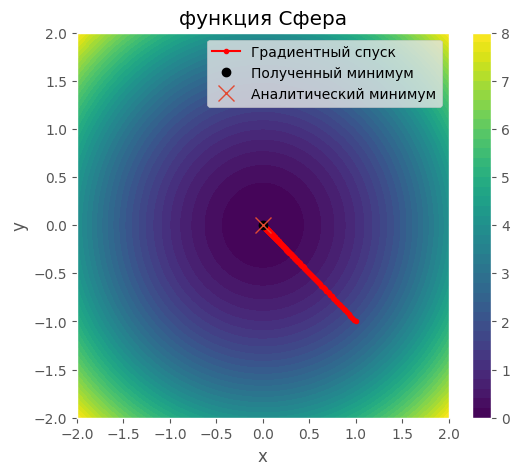

In [123]:
def test_sphere():
    x0 = [1.0, -1.0]

    x_opt, f_opt, history = gradient_descent(
        f=sphere,
        grad_f=sphere_grad_analytic,
        x0=x0,
        alpha=0.01,
        eps=1e-6,
        max_iter=10000
    )
    
    true_min = np.array([0.0, 0.0])
    error = np.linalg.norm(x_opt - true_min)
    print(f"Найденная точка: {x_opt}, значение функции: {f_opt}, ошибка: {error}")

    fig, ax = plot_contours_sphere(xmin=-2, xmax=2, ymin=-2, ymax=2, resolution=200)
    
    history_arr = np.array(history)
    ax.plot(history_arr[:, 0], history_arr[:, 1], 'r.-', label='Градиентный спуск')
    ax.plot([x_opt[0]], [x_opt[1]], 'ko', label='Полученный минимум')
    ax.plot([true_min[0]], [true_min[1]], 'x', markersize=12, label='Аналитический минимум')
    
    ax.legend()
    plt.show()

test_sphere()

![sphere.png](images/sphere.png)

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def plot_contours_booth(xmin=-10, xmax=10, ymin=-10, ymax=10, resolution=200):
    x_vals = np.linspace(xmin, xmax, resolution)
    y_vals = np.linspace(ymin, ymax, resolution)
    X, Y = np.meshgrid(x_vals, y_vals)

    Z = np.zeros_like(X)
    for i in range(resolution):
        for j in range(resolution):
            Z[i, j] = booth(X[i, j], Y[i, j])
    
    fig, ax = plt.subplots(figsize=(6, 5))
    cs = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cs, ax=ax)
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("функция Бута")
    return fig, ax


[Gradient Descent] Booth test
Начальная точка : [0.0, 0.0]
Найденная точка : [1.00000035 2.99999965]
f_opt       : 2.491860819492968e-13
Ошибка       : 4.991854182491145e-07


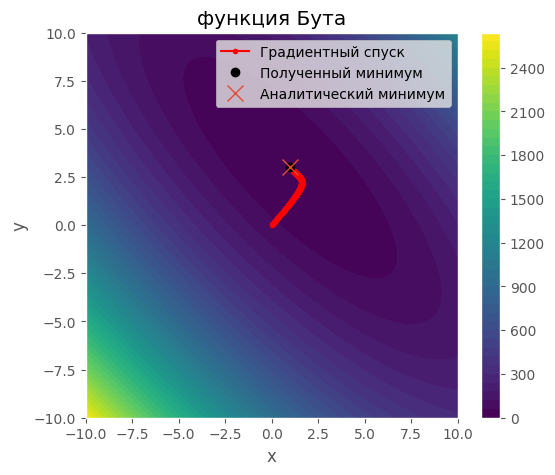

In [125]:
def test_booth_gradient_descent():
    x0 = [0.0, 0.0]

    x_opt, f_opt, history = gradient_descent(
        f=booth,
        grad_f=booth_grad_analytic,
        x0=x0,
        alpha=0.001,  # Шаг
        eps=1e-6,
        max_iter=10000
    )

    true_min = np.array([1.0, 3.0])
    error = np.linalg.norm(x_opt - true_min)
    print("[Gradient Descent] Booth test")
    print(f"Начальная точка : {x0}")
    print(f"Найденная точка : {x_opt}")
    print(f"f_opt       : {f_opt}")
    print(f"Ошибка       : {error}")

    fig, ax = plot_contours_booth(xmin=-10, xmax=10, ymin=-10, ymax=10, resolution=200)
    history_arr = np.array(history)
    ax.plot(history_arr[:, 0], history_arr[:, 1], 'r.-', label='Градиентный спуск')
    ax.plot([x_opt[0]], [x_opt[1]], 'ko', label='Полученный минимум')
    ax.plot([true_min[0]], [true_min[1]], 'x', markersize=12, label='Аналитический минимум')
    ax.legend()
    plt.show()


test_booth_gradient_descent()


## Моментная модификация

In [126]:
import numpy as np

def momentum_descent(
    f, grad_f, x0,
    alpha=0.001,   # базовый шаг обучения
    beta=0.9,      # коэффициент момента
    eps=1e-6,      # порог остановки по норме градиента
    max_iter=10000
):
    x_current = np.array(x0, dtype=float)
    history = [x_current.copy()]
    v = np.zeros_like(x_current)  # Изначально скорость = 0

    for _ in range(max_iter):
        grad = grad_f(x_current)
        if np.linalg.norm(grad) < eps:
            break
        
        # Обновляем скорость с учетом момента
        v = beta * v + alpha * grad
        
        # Делаем шаг
        x_next = x_current - v

        history.append(x_next.copy())
        x_current = x_next
    
    return x_current, f(*x_current), history


In [127]:
def test_momentum_rosenbrock():
    x0 = [-1.0, 2.0]
    x_opt, f_opt, history = momentum_descent(
        f=rosenbrock,
        grad_f=rosenbrock_grad_analytic,
        x0=x0,
        alpha=0.0005,
        beta=0.9,
        eps=1e-6,
        max_iter=20000
    )
    # Аналитический минимум: (1,1)
    true_min = np.array([1.0, 1.0])
    error = np.linalg.norm(x_opt - true_min)
    print(f"[Momentum] Rosenbrock:")
    print(f"Начальная точка: {x0}")
    print(f"Найденная точка   = {x_opt}")
    print(f"f_opt         = {f_opt}")
    print(f"Ошибка = {error}\n")


test_momentum_rosenbrock()


[Momentum] Rosenbrock:
Начальная точка: [-1.0, 2.0]
Найденная точка   = [0.99999888 0.99999776]
f_opt         = 1.2510070351865756e-12
Ошибка = 2.5030065193649666e-06



In [128]:
def test_momentum_sphere():
    x0 = [2.0, -1.0]  # Пример начальной точки
    x_opt, f_opt, history = momentum_descent(
        f=sphere,
        grad_f=sphere_grad_analytic,
        x0=x0,
        alpha=0.01,
        beta=0.9,
        eps=1e-6,
        max_iter=10000
    )
    # Аналитический миниму (0,0)
    true_min = np.array([0.0, 0.0])
    error = np.linalg.norm(x_opt - true_min)
    print(f"[Momentum] Sphere:")
    print(f"Начальная точка: {x0}")
    print(f"Найденная точка   = {x_opt}")
    print(f"f_opt         = {f_opt}")
    print(f"Ошибка = {error}\n")

test_momentum_sphere()

[Momentum] Sphere:
Начальная точка: [2.0, -1.0]
Найденная точка   = [-9.71091127e-08  4.85545563e-08]
f_opt         = 1.1787724700254009e-14
Ошибка = 1.0857128856310958e-07



[Momentum] Booth test
Начальная точка : [5.0, -5.0]
Найденная точка : [1.00000035 2.99999965]
f_opt       : 2.4053163473325425e-13
Ошибка       : 4.904402456765215e-07


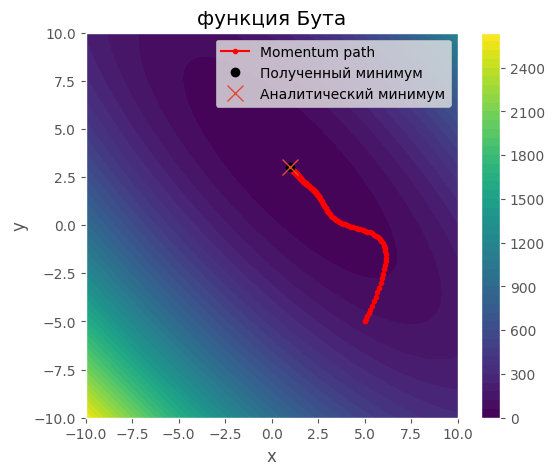

In [129]:
def test_booth_momentum():
    x0 = [5.0, -5.0]

    x_opt, f_opt, history = momentum_descent(
        f=booth,
        grad_f=booth_grad_analytic,
        x0=x0,
        alpha=0.001,
        beta=0.9,
        eps=1e-6,
        max_iter=10000
    )

    # 3) Результаты
    true_min = np.array([1.0, 3.0])
    error = np.linalg.norm(x_opt - true_min)
    print("[Momentum] Booth test")
    print(f"Начальная точка : {x0}")
    print(f"Найденная точка : {x_opt}")
    print(f"f_opt       : {f_opt}")
    print(f"Ошибка       : {error}")

    fig, ax = plot_contours_booth(xmin=-10, xmax=10, ymin=-10, ymax=10, resolution=200)
    history_arr = np.array(history)
    ax.plot(history_arr[:, 0], history_arr[:, 1], 'r.-', label='Momentum path')
    ax.plot([x_opt[0]], [x_opt[1]], 'ko', label='Полученный минимум')
    ax.plot([true_min[0]], [true_min[1]], 'x', markersize=12, label='Аналитический минимум')
    ax.legend()
    plt.show()

test_booth_momentum()

## Адаптивная модификация Adagrad

In [130]:
import numpy as np

def adagrad_descent(
    f, grad_f, x0,
    alpha=0.1,
    eps=1e-8,
    grad_norm_tol=1e-6,
    max_iter=10000
):
    
    x_current = np.array(x0, dtype=float)
    history = [x_current.copy()]

    G = np.zeros_like(x_current)  

    for _ in range(max_iter):
        grad = grad_f(x_current)
        
        if np.linalg.norm(grad) < grad_norm_tol:
            break
        
        G += grad * grad  # G = G + grad**2
        
        x_next = x_current - alpha * grad / (np.sqrt(G) + eps)
        
        history.append(x_next.copy())
        x_current = x_next

    return x_current, f(*x_current), history


In [131]:
def test_adagrad_rosenbrock():
    x0 = [2.0, 2.0]
    x_opt, f_opt, history = adagrad_descent(
        f=rosenbrock,
        grad_f=rosenbrock_grad_analytic,
        x0=x0,
        alpha=0.1,
        eps=1e-8,
        grad_norm_tol=1e-6,
        max_iter=50000
    )

    true_min = np.array([1.0, 1.0])
    error = np.linalg.norm(x_opt - true_min)
    
    print("[AdaGrad] Rosenbrock test")
    print(f"Начальная точка   : {x0}")
    print(f"Найденная точка   : {x_opt}")
    print(f"Найденная f       : {f_opt}")
    print(f"Ошибка : {error}")
    print()
    

test_adagrad_rosenbrock()

[AdaGrad] Rosenbrock test
Начальная точка   : [2.0, 2.0]
Найденная точка   : [1.14984258 1.32251984]
Найденная f       : 0.02246738159159223
Ошибка : 0.35562880031285604



In [132]:
def test_adagrad_sphere():
    x0 = [1.0, -2.0]
    x_opt, f_opt, history = adagrad_descent(
        f=sphere,
        grad_f=sphere_grad_analytic,
        x0=x0,
        alpha=0.2,
        eps=1e-8,
        grad_norm_tol=1e-6,
        max_iter=5000
    )

    true_min = np.array([0.0, 0.0])
    error = np.linalg.norm(x_opt - true_min)

    print("[AdaGrad] Sphere test")
    print(f"Начальная точка   : {x0}")
    print(f"Найденная точка   : {x_opt}")
    print(f"Найденная f       : {f_opt}")
    print(f"Error to true : {error}")
    print()
    

test_adagrad_sphere()

[AdaGrad] Sphere test
Начальная точка   : [1.0, -2.0]
Найденная точка   : [ 4.12013268e-23 -4.97577818e-07]
Найденная f       : 2.4758368522977186e-13
Error to true : 4.975778182654165e-07



[AdaGrad] Booth test
Начальная точка : [8.0, 8.0]
Найденная точка : [1.10881854 2.8924224 ]
f_opt       : 0.023420573639551717
Ошибка       : 0.15301769158289447


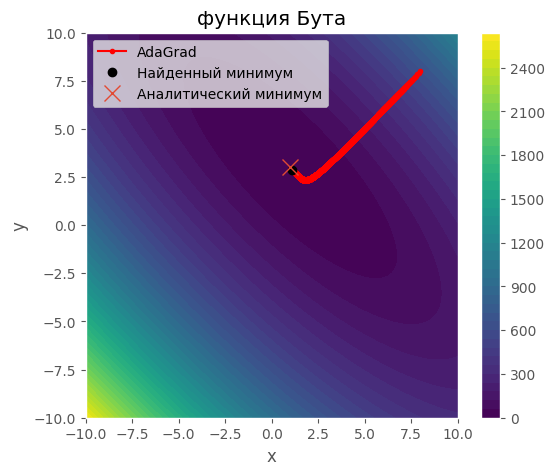

In [133]:
def test_booth_adagrad():
    x0 = [8.0, 8.0]

    x_opt, f_opt, history = adagrad_descent(
        f=booth,
        grad_f=booth_grad_analytic,
        x0=x0,
        alpha=0.1,
        eps=1e-8,
        grad_norm_tol=1e-6,
        max_iter=20000
    )

    true_min = np.array([1.0, 3.0])
    error = np.linalg.norm(x_opt - true_min)
    print("[AdaGrad] Booth test")
    print(f"Начальная точка : {x0}")
    print(f"Найденная точка : {x_opt}")
    print(f"f_opt       : {f_opt}")
    print(f"Ошибка       : {error}")

    fig, ax = plot_contours_booth(xmin=-10, xmax=10, ymin=-10, ymax=10, resolution=200)
    history_arr = np.array(history)
    ax.plot(history_arr[:, 0], history_arr[:, 1], 'r.-', label='AdaGrad')
    ax.plot([x_opt[0]], [x_opt[1]], 'ko', label='Найденный минимум')
    ax.plot([true_min[0]], [true_min[1]], 'x', markersize=12, label='Аналитический минимум')
    ax.legend()
    plt.show()

test_booth_adagrad()
